In [1]:
#imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import png

%matplotlib inline

Best goodness  10.480349344978166
################################################


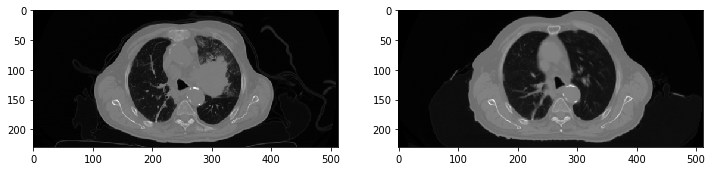

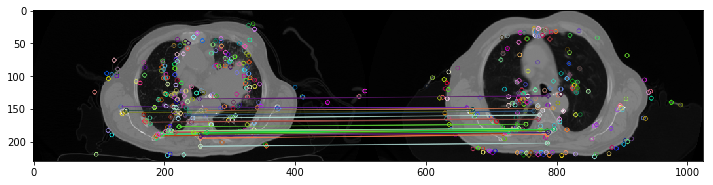

In [2]:
source_dir = r'Pre-png'

list_of_files = os.listdir(source_dir)

img_array = []
png = []

original = cv2.imread('Post-png/595.png',0)

original = original[120:350,:]

for file in list_of_files:
    f = os.path.join(source_dir,file)
    img_array.append(file)
    png.append(cv2.imread(f,0))
 
    result1 = []

    maxi = 0
    
for image_to_compare in png:
 
    image_to_compare = image_to_compare[120:350,:]
    sift = cv2.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(original, None)
    kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)
 
    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    flann = cv2.FlannBasedMatcher(index_params, search_params)
 
    matches = flann.knnMatch(desc_1, desc_2, k=2)
 
    good_points = []
    for m, n in matches:
        if m.distance < 0.6*n.distance:
            good_points.append(m)
 
    # Define how similar they are
    number_keypoints = 0
    if len(kp_1) <= len(kp_2):
        number_keypoints = len(kp_1)
    else:
        number_keypoints = len(kp_2)
 
    #print("Keypoints 1ST Image: " + str(len(kp_1)))
    #print("Keypoints 2ND Image: " + str(len(kp_2)))
    #print("GOOD Matches:", len(good_points))
    goodness = len(good_points) / number_keypoints * 100
    #print("How good it's the match: ", goodness)

    if goodness > maxi:
        maxi = goodness
        file_max = image_to_compare
        result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)     
        
print("Best goodness ",maxi)

print("################################################")

plt.figure(figsize=(12,20))   
plt.subplot(121)
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.imshow(file_max, cmap='gray')
plt.savefig("openCV-match-11.pdf")
plt.show()
plt.figure(figsize=(12,20))
plt.subplot(111)
plt.imshow(result, cmap='gray')
plt.savefig("openCV-match.pdf")
#plt.show()


